# **Adagrad and RMSProp Optimizers Implementation**


---


## **Import Necessary Libraries**


In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

## **Load the Data**


In [148]:
data = pd.read_csv("./Data/Multivariables_LR_Data.csv")

In [149]:
data.head()

,X1,X2,X3,y
0,73.0,80.0,75.0,152.0
1,93.0,88.0,93.0,185.0
2,89.0,91.0,90.0,180.0
3,96.0,98.0,100.0,196.0
4,73.0,66.0,70.0,142.0


In [150]:
data.shape

(25, 4)

## **Define Variables 𝑋 and 𝑦**


In [151]:
X = data.drop("y", axis=1).values
X = np.insert(X, 0, 1, axis=1)

y = data["y"].values.reshape(-1, 1)

## **Plot Loss Function**


In [152]:
def plot_loss(loss, title="Loss over Updates", color="r", marker="o"):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(loss)), loss, f"{marker}-{color}", label="Loss")
    plt.title(title)
    plt.xlabel(f"Epochs (Total: {len(loss)})")
    plt.ylabel("Loss (J(θ))")
    plt.legend()
    plt.tight_layout()
    plt.show()

---


## **Adagrad Gradient Descent**


#### **Adagrad Key Formulas**


**Accumulated squared gradients**

$$
V_{(t)} = V_{(t-1)} + \left( \nabla J(\theta_{(t)}) \right)^2
$$



**Parameter update**

$$
\theta_{(t+1)} = \theta_{(t)} - \frac{\alpha}{\sqrt{V_{(t)}} + \epsilon} \, \nabla J(\theta_{(t)})
$$




**Explanation of Symbols**

| Symbol                   | Meaning                                                  |
| ------------------------ | -------------------------------------------------------- |
| $\theta_{(t)}$           | Parameter vector at iteration $t$                        |
| $\nabla J(\theta_{(t)})$ | Gradient of the cost function at $\theta_{(t)}$          |
| $V_{(t)}$                | Accumulated sum of squared gradients up to iteration $t$ |
| $\alpha$                 | Learning rate                                            |
| $\epsilon$               | Small constant to avoid division by zero                 |
| $J(\theta)$              | Cost function (e.g., Mean Squared Error)                 |

---


In [153]:
import numpy as np


def adagrad_gradient_descent(
    X,
    y,
    learning_rate=1e-2,
    epsilon=1e-8,
    max_iterations=100,
    gradient_tol=1e-2,
    loss_threshold=0.01,
    verbose=False,
    print_every=10,
):
    """
    Adagrad Gradient Descent Optimizer.

    Args:
        X (np.ndarray): Feature matrix (m, n)
        y (np.ndarray): Target vector (m, 1)
        learning_rate (float): Initial learning rate
        epsilon (float): Small value to prevent division by zero
        max_iterations (int): Maximum number of iterations
        gradient_tol (float): Gradient norm threshold for convergence
        loss_threshold (float): Loss change threshold for convergence
        verbose (bool): Whether to print detailed logs
        print_every (int): Print progress every N iterations

    Returns:
        theta (np.ndarray): Final parameter values
        losses (list): List of loss values during training
    """
    m, n = X.shape
    theta = np.zeros((n, 1))
    v = np.zeros((n, 1))  # Accumulated squared gradients
    losses = []

    for i in range(max_iterations):
        # Compute predictions and error
        h_X = X @ theta
        error = h_X - y

        # Compute cost (MSE)
        cost = (1 / (2 * m)) * np.sum(error**2)
        losses.append(cost)

        # Compute gradient
        gradient = (1 / m) * (X.T @ error)
        gradient_norm = np.linalg.norm(gradient)

        # Update accumulated squared gradients
        v += gradient**2

        # Update parameters
        theta -= (learning_rate / (np.sqrt(v) + epsilon)) * gradient

        # Verbose logging
        if verbose and (i % print_every == 0 or i == max_iterations - 1):
            print(f" Iteration {i + 1} ".center(60, "—"))
            print(f"Predictions [h(x) = Xθ]:\n {h_X.ravel()}")
            print(f"Error vector [e = h(x) - y]:\n {error.ravel()}")
            print(f"Cost function [J(θ) = (1/2m) * Σ(e²)]: {cost:.6f}")
            print(f"Gradient [▽J(θ) = (1/m) * Σ(ex)]: {gradient.ravel()}")
            print(f"Gradient norm: {gradient_norm:.6f}")
            print(
                f"Accumulated squared gradients [V(t) = V(t-1) + ▽J(θ)²]:\n {v.ravel()}"
            )
            print(
                f"Updated parameters [θ(t+1) = θ(t) - (α / (√V(t) + ε)) * ▽J(θ)]:\n {theta.ravel()}"
            )

        # Check convergence
        if gradient_norm < gradient_tol:
            print(f"Converged by gradient norm at iteration {i + 1}")
            break
        if i > 0 and abs(losses[-1] - losses[-2]) < loss_threshold:
            print(f"Converged by loss change at iteration {i + 1}")
            break

    return theta, losses

In [154]:
final_theta, adagrad_loss = adagrad_gradient_descent(
    X,
    y,
    learning_rate=0.01,
    epsilon=1e-8,
    max_iterations=1000,
    gradient_tol=0.01,
    loss_threshold=0.01,
    verbose=True,
    print_every=100,
)

print("Final theta:", final_theta.ravel())

——————————————————————— Iteration 1 ————————————————————————
Predictions [h(x) = Xθ]:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
Error vector [e = h(x) - y]:
 [-152. -185. -180. -196. -142. -101. -149. -115. -175. -164. -141. -141.
 -184. -152. -148. -192. -147. -183. -177. -159. -177. -175. -175. -149.
 -192.]
Cost function [J(θ) = (1/2m) * Σ(e²)]: 13405.980000
Gradient [▽J(θ) = (1/m) * Σ(ex)]: [  -162.04 -13075.8  -13147.2  -13467.08]
Gradient norm: 22917.545989
Accumulated squared gradients [V(t) = V(t-1) + ▽J(θ)²]:
 [2.62569616e+04 1.70976546e+08 1.72848868e+08 1.81362244e+08]
Updated parameters [θ(t+1) = θ(t) - (α / (√V(t) + ε)) * ▽J(θ)]:
 [0.01 0.01 0.01 0.01]
—————————————————————— Iteration 101 ———————————————————————
Predictions [h(x) = Xθ]:
 [40.21622496 48.29463036 47.59214218 51.80696777 36.87952542 27.22064158
 38.81134525 28.80121141 45.13356396 41.79689566 37.40639674 36.87957112
 49.17267    40.9186551  38.98697025 48.99711644 38.9868

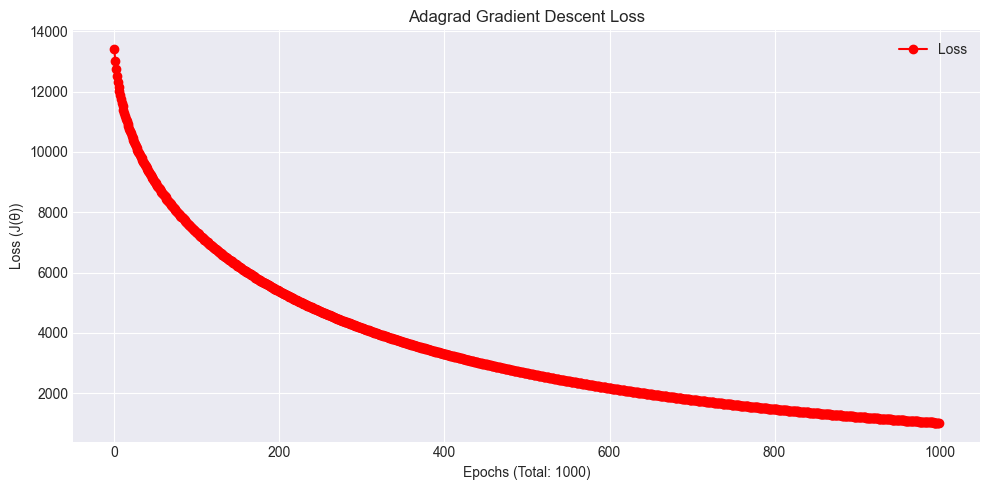

In [155]:
plot_loss(adagrad_loss, title="Adagrad Gradient Descent Loss")

---


## **RMSProp Gradient Descent**


#### **RMSProp Key Formulas**


**Accumulated moving average of squared gradients**

$$
V_{(t)} = \beta V_{(t-1)} + (1 - \beta) \left( \nabla J(\theta_{(t)}) \right)^2
$$


**Parameter update**

$$
\theta_{(t+1)} = \theta_{(t)} - \frac{\alpha}{\sqrt{V_{(t)}} + \epsilon} \, \nabla J(\theta_{(t)})
$$



**Explanation of Symbols**

| Symbol                   | Meaning                                             |
| ------------------------ | --------------------------------------------------- |
| $\theta_{(t)}$           | Parameter vector at iteration $t$                   |
| $\nabla J(\theta_{(t)})$ | Gradient of the cost function at $\theta_{(t)}$     |
| $V_{(t)}$                | Exponentially decaying average of squared gradients |
| $\alpha$                 | Learning rate                                       |
| $\beta$                  | Decay rate (e.g., 0.9)                              |
| $\epsilon$               | Small constant to avoid division by zero            |
| $J(\theta)$              | Cost function                                       |

---

In [156]:
import numpy as np


def rmsprop_gradient_descent(
    X,
    y,
    learning_rate=1e-2,
    beta=0.9,
    epsilon=1e-8,
    max_iterations=100,
    gradient_tol=1e-2,
    loss_threshold=0.01,
    verbose=False,
    print_every=10,
):
    """
    RMSProp Gradient Descent Optimizer.

    Args:
        X (np.ndarray): Feature matrix (m, n)
        y (np.ndarray): Target vector (m, 1)
        learning_rate (float): Learning rate (alpha)
        beta (float): Decay rate for moving average of squared gradients
        epsilon (float): Small constant to prevent division by zero
        max_iterations (int): Maximum number of iterations
        gradient_tol (float): Gradient norm threshold for convergence
        loss_threshold (float): Loss change threshold for convergence
        verbose (bool): Whether to print detailed logs
        print_every (int): Print frequency

    Returns:
        theta (np.ndarray): Final parameter values
        losses (list): List of loss values during training
    """
    m, n = X.shape
    theta = np.zeros((n, 1))
    v = np.zeros((n, 1))  # Moving average of squared gradients
    losses = []

    for i in range(max_iterations):
        # Compute predictions and error
        h_X = X @ theta
        error = h_X - y

        # Compute cost (MSE)
        cost = (1 / (2 * m)) * np.sum(error**2)
        losses.append(cost)

        # Compute gradient
        gradient = (1 / m) * (X.T @ error)
        gradient_norm = np.linalg.norm(gradient)

        # Update moving average of squared gradients
        v = beta * v + (1 - beta) * (gradient**2)

        # Update parameters
        theta -= (learning_rate / (np.sqrt(v) + epsilon)) * gradient

        # Verbose logging
        if verbose and (i % print_every == 0 or i == max_iterations - 1):
            print(f" Iteration {i + 1} ".center(60, "—"))
            print(f"Predictions [h(x) = Xθ]:\n {h_X.ravel()}")
            print(f"Error vector [e = h(x) - y]:\n {error.ravel()}")
            print(f"Cost function [J(θ) = (1/2m) * Σ(e²)]: {cost:.6f}")
            print(f"Gradient [▽J(θ) = (1/m) * Σ(ex)]: {gradient.ravel()}")
            print(f"Gradient norm: {gradient_norm:.6f}")
            print(
                f"Moving avg of squared gradients [V(t) = βV(t-1) + (1-β)▽J(θ)²]:\n {v.ravel()}"
            )
            print(
                f"Updated parameters [θ(t+1) = θ(t) - (α / (√V(t) + ε)) * ▽J(θ)]:\n {theta.ravel()}"
            )

        # Convergence checks
        if gradient_norm < gradient_tol:
            print(f"Converged by gradient norm at iteration {i + 1}")
            break
        if i > 0 and abs(losses[-1] - losses[-2]) < loss_threshold:
            print(f"Converged by loss change at iteration {i + 1}")
            break

    return theta, losses

In [157]:
final_theta, rmsprop_loss = rmsprop_gradient_descent(
    X,
    y,
    learning_rate=0.01,
    beta=0.9,
    epsilon=1e-8,
    max_iterations=1000,
    gradient_tol=0.01,
    loss_threshold=0.01,
    verbose=True,
    print_every=10,
)

print("Final theta:", final_theta.ravel())

——————————————————————— Iteration 1 ————————————————————————
Predictions [h(x) = Xθ]:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
Error vector [e = h(x) - y]:
 [-152. -185. -180. -196. -142. -101. -149. -115. -175. -164. -141. -141.
 -184. -152. -148. -192. -147. -183. -177. -159. -177. -175. -175. -149.
 -192.]
Cost function [J(θ) = (1/2m) * Σ(e²)]: 13405.980000
Gradient [▽J(θ) = (1/m) * Σ(ex)]: [  -162.04 -13075.8  -13147.2  -13467.08]
Gradient norm: 22917.545989
Moving avg of squared gradients [V(t) = βV(t-1) + (1-β)▽J(θ)²]:
 [2.62569616e+03 1.70976546e+07 1.72848868e+07 1.81362244e+07]
Updated parameters [θ(t+1) = θ(t) - (α / (√V(t) + ε)) * ▽J(θ)]:
 [0.03162278 0.03162278 0.03162278 0.03162278]
——————————————————————— Iteration 11 ———————————————————————
Predictions [h(x) = Xθ]:
 [37.80666129 45.40104192 44.74064657 48.7029364  34.66987822 25.5897034
 36.4859474  27.07557021 42.4293665  39.29260826 35.16517884 34.66991453
 46.22648001 38.46701051 

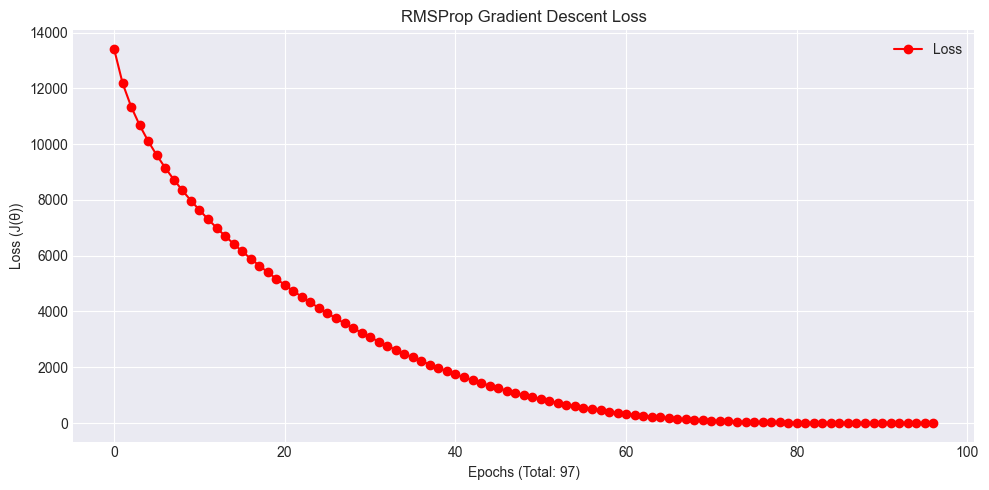

In [158]:
plot_loss(rmsprop_loss, title="RMSProp Gradient Descent Loss")

---


## **Adagrad vs RMSProp Loss Comparison**


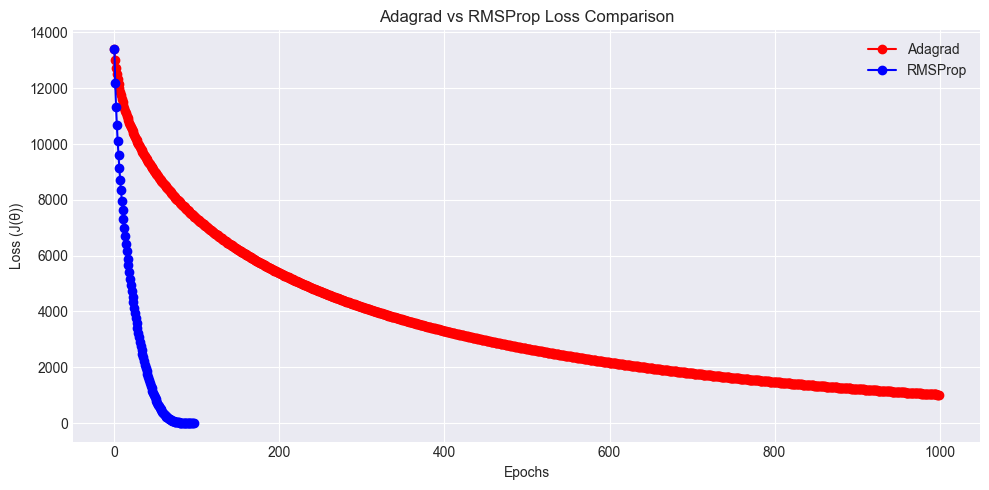

In [159]:
plt.figure(figsize=(10, 5))
plt.plot(adagrad_loss, "o-r", label="Adagrad")
plt.plot(rmsprop_loss, "o-b", label="RMSProp")
plt.title("Adagrad vs RMSProp Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss (J(θ))")
plt.legend()
plt.tight_layout()
plt.show()

---
